Write a main.ipynb notebook that summarizes and discusses your results. It can contain figures referenced from disk or simple summary information (for example if you want to display part of a dataframe) from variables read from disk, but no significant computations at all. Think of this as your “paper”.

Discuss the assumptions you can make about the data to justify your analysis. You have no control over the original data acquisition and measurement, and for many of you this project will likely fall under the broad purview of Exploratory Data Analysis. If you propose any statistical hypothesis/model in your analysis, discuss your justifications, considering how the data was acquired. We are not expecting you to spend a lot of time dealing with how to best model or describe the data. Try to identify a few scientifically interesting but simple questions you can address and then focus on writing the code for such an analysis.

Like with each of the analysis notebooks in the previous section, you should also build your main narrative as a PDF using MyST.


In [11]:
import pandas as pd
import tools as ds
from IPython.display import Image

# Conda env note


make environment:

conda env create -f environment.yml

Make sure you ran `conda activate final` first, so these commands apply in the right place
conda env update --file environment.yml --prune

again - make sure to `conda activate final` first!
python -m ipykernel install --user --name final --display-name "IPython - final_project"

## Data Description

In [4]:
crashes_initial = pd.read_csv('data/Crashes.csv')
crashes_initial.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,7034739,2015,2015-08-22,3801,2015-02-26,1931,000985,RICHM,4,5,...,0,0,-,-,NaN,NaN,SAN FRANCISCO,SAN FRANCISCO,-122.458750,37.779350
1,7035304,2014,2015-08-24,3801,2014-12-25,2245,A09861,INGLE,4,5,...,0,0,-,-,NaN,NaN,SAN FRANCISCO,SAN FRANCISCO,-122.418788,37.710855
2,7202472,2016,2016-03-09,3801,2016-02-11,1100,1572,NaN,4,5,...,0,0,-,-,NaN,NaN,SAN FRANCISCO,SAN FRANCISCO,-122.395850,37.781310
3,8042422,2016,2016-05-16,3801,2016-04-13,1050,001588,CENTR,3,5,...,0,0,-,-,NaN,NaN,SAN FRANCISCO,SAN FRANCISCO,-122.399682,37.794241
4,8046723,2016,2016-05-18,3801,2016-04-16,1614,2472,MISIS,6,5,...,0,0,-,-,NaN,NaN,SAN FRANCISCO,SAN FRANCISCO,-122.429839,37.761200


### Data Preprocessing

There are 80 columns describing a bike crash instance, with many containing code words that are interpreted here: https://tims.berkeley.edu/help/SWITRS.php#Codebook

In [9]:
# add columns that are decoded from the SWITRS codebook (e.g. weekday 1 = Sunday) 
crashes = ds.decode_switrs(crashes_initial, create_new_columns=True)

#ensure date is in dt format
crashes['COLLISION_DATE_CLEAN'] = pd.to_datetime(crashes['COLLISION_DATE'], format = 'mixed', errors = 'coerce')

Created decoded column: WEATHER_1_DESC
Created decoded column: WEATHER_2_DESC
Created decoded column: COLLISION_SEVERITY_DESC
Created decoded column: TYPE_OF_COLLISION_DESC
Created decoded column: ROAD_SURFACE_DESC
Created decoded column: LIGHTING_DESC
Created decoded column: PRIMARY_COLL_FACTOR_DESC
Created decoded column: PCF_VIOL_CATEGORY_DESC
Created decoded column: DAY_OF_WEEK_DESC
Created decoded column: MVIW_DESC


## EDA : Visualizing Bike Collision Trends

In our analysis, we aim to identify general trends across bike collisions, spanning temporal and categorical conditions. In these visuals we explore the impact of the pandemic, time of year, time of day, and several road and accident conditions that are associated with our data's bike crashes.

The onset of the pandemic is associated with a significant drop in bike collisions, very likely due to the fact that there was a general drop in people riding bikes in places or times that were higher risk of getting into a collision. We speculate that a number of factors contributed to the decrease in high-risk bike use from the pandemic, such as the initial quarantine, the residual hybrid or remote work, and general changes in transportation habits. Despite the pandemic conditions improving by 2023, we still a slow inertia in returning to pre-pandemic biking conditions, as seen below:

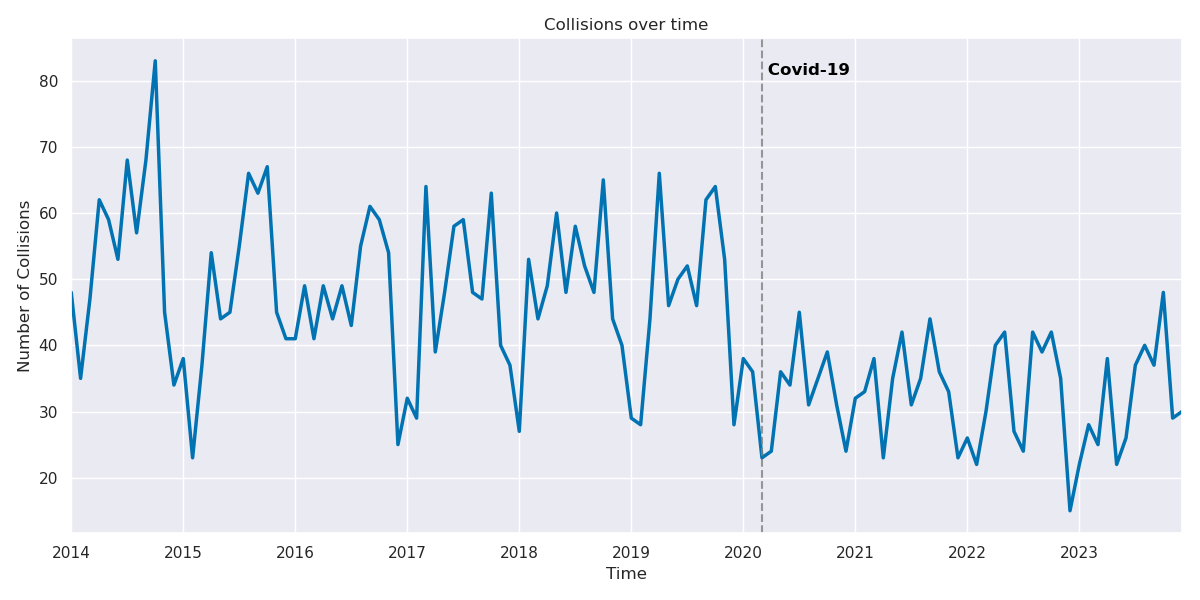

In [13]:
Image(filename = "figures/Collisions_by_year.png")

Looking at collisions by month, we see a general trend of less commuters during the winter months of December, January, and February. Brr!

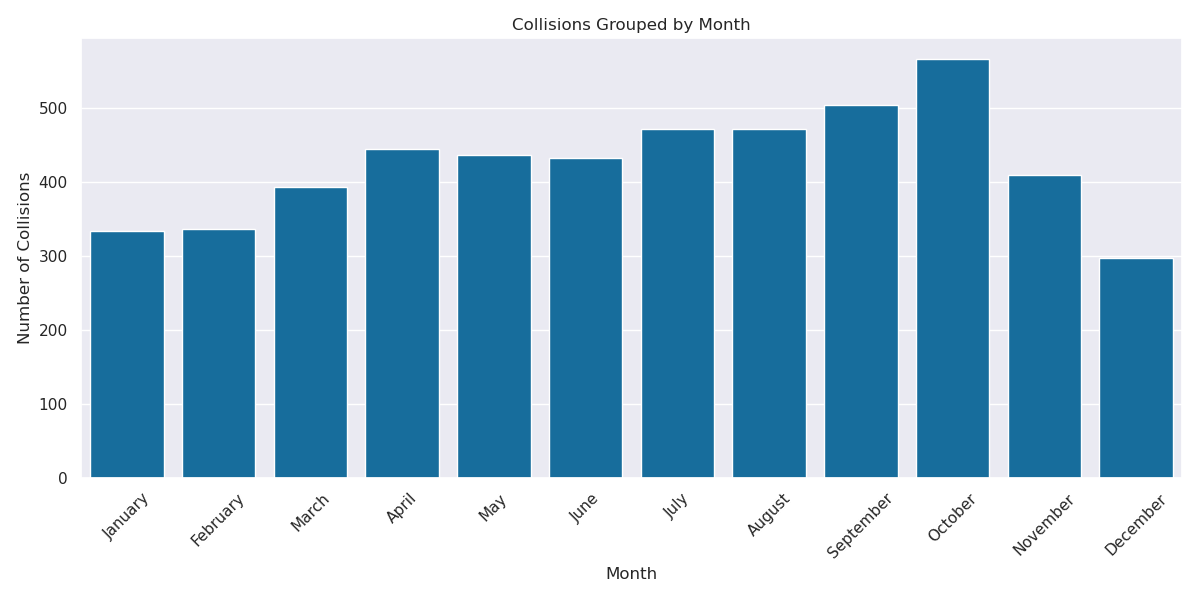

In [16]:
Image(filename = "figures/Collisions_by_month.png")

As shown in the figure below, there are no very obvious differences across seasons, in terms of categorical condition variation. However, there is certainly a marked differences in the number of crashes per season, with Winter having the lowest and Fall having the highest (cumulatively). We also note that Fall and Winter have more crashes in the dark, likely due to shorter days but unchanging work hours.

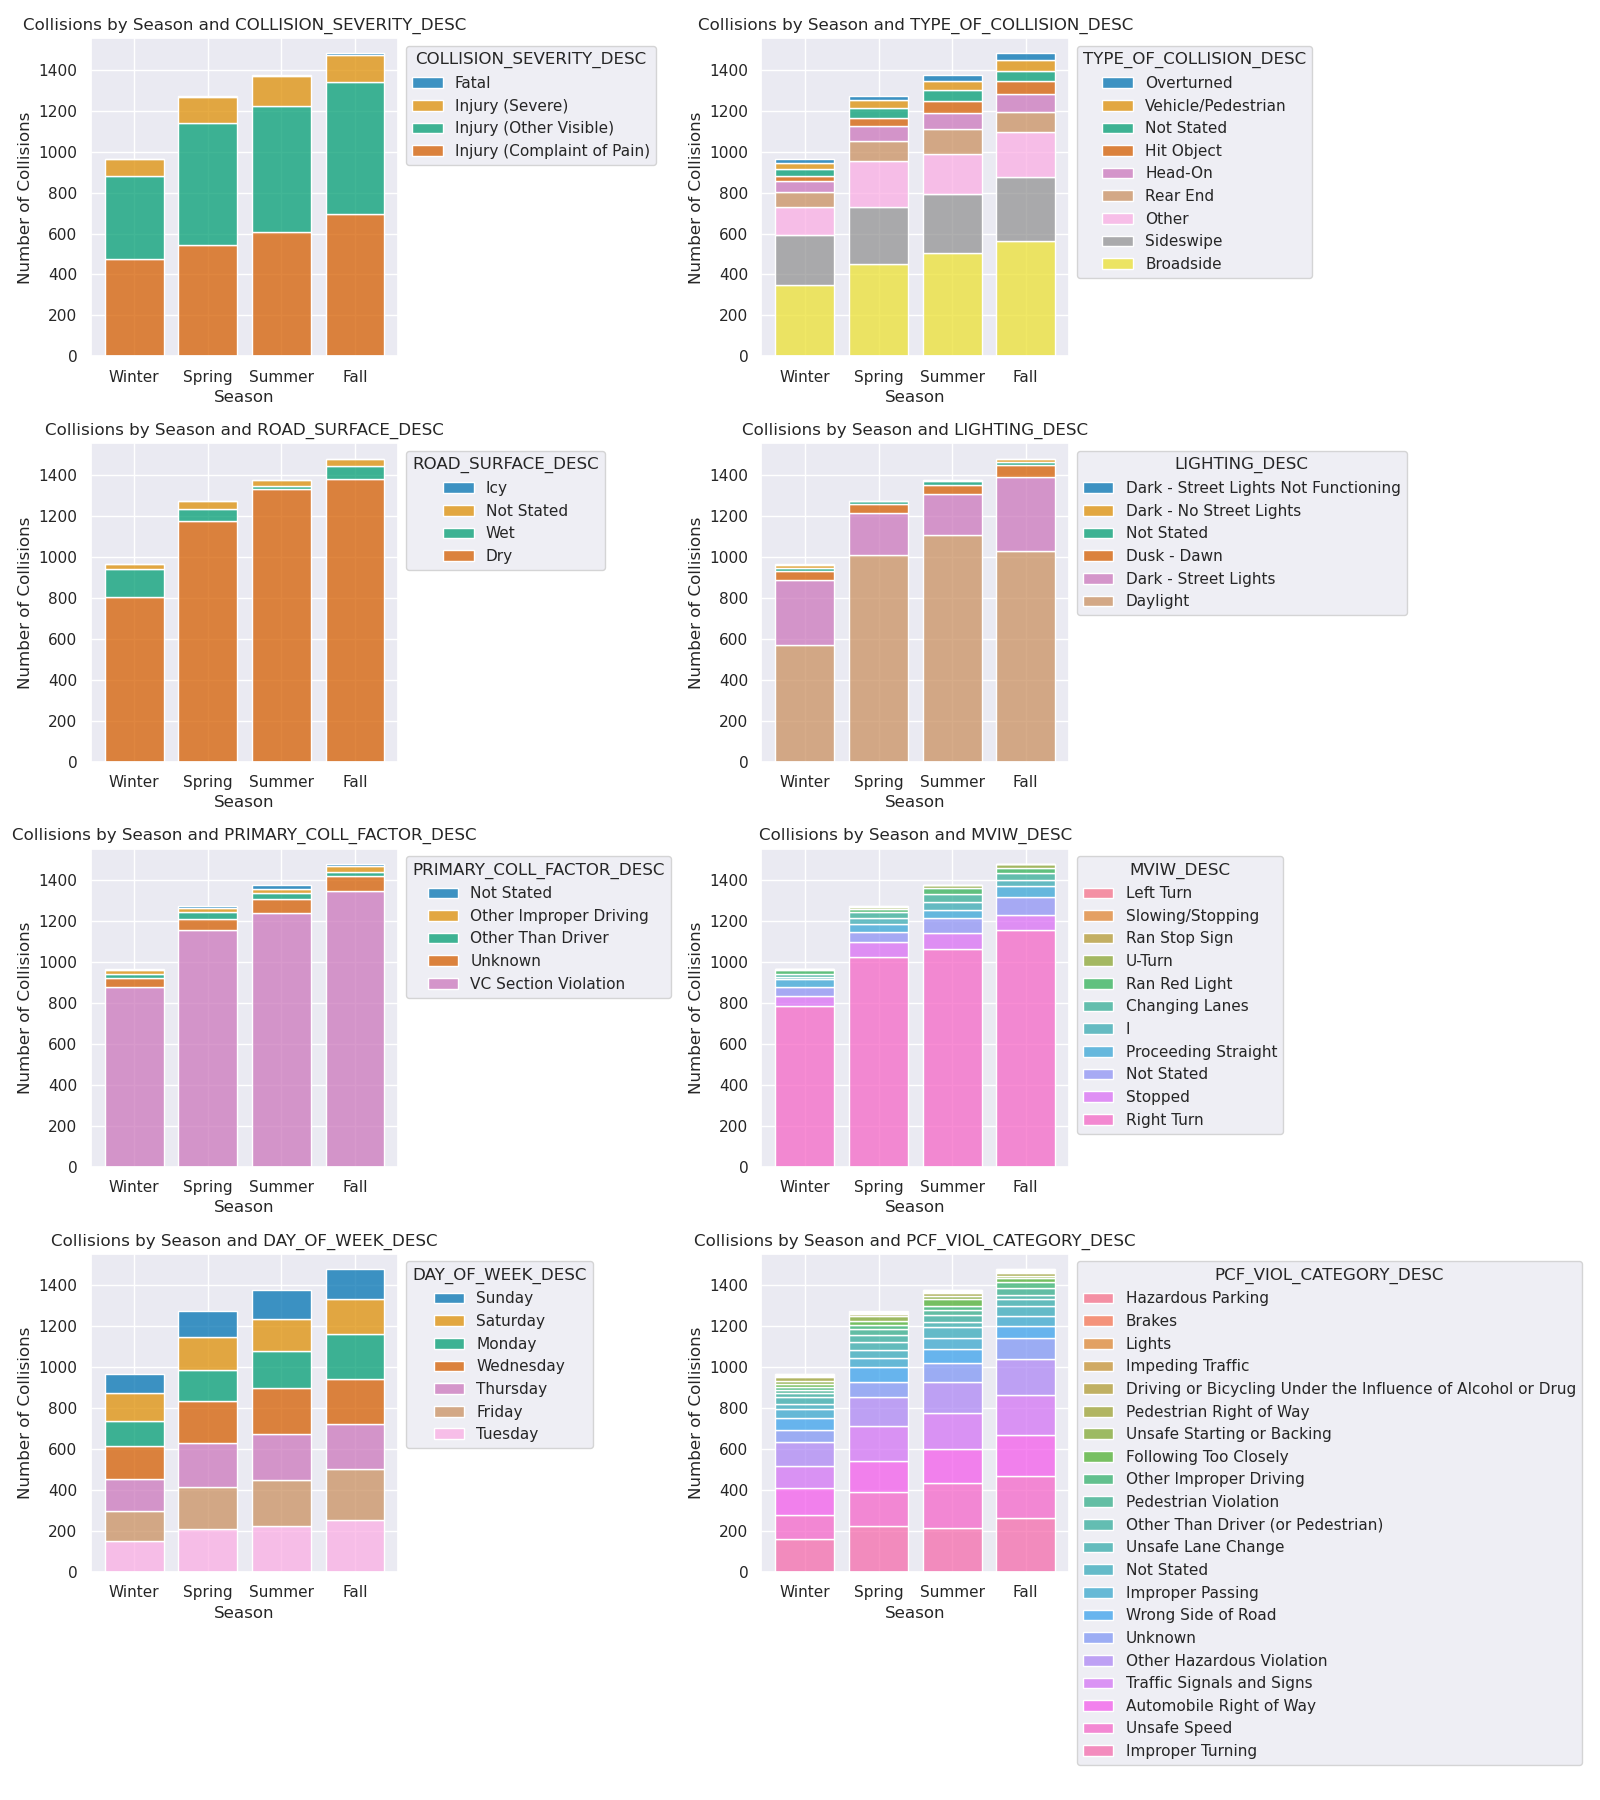

In [20]:
Image(filename = "figures/Collisions_Categories_by_Season.png")

We conducted the same categorical tests, but across days of the week. We see a noteable difference between the typical Monday - Friday work week with lower collision counts for the typical Saturday and Sunday weekend. 'Recreational' biking, we infer, is less of a contributor to SF's bike collisions as compared to commuting bike accidents, where bikers are commuting in the morning alongside cars and busses.  

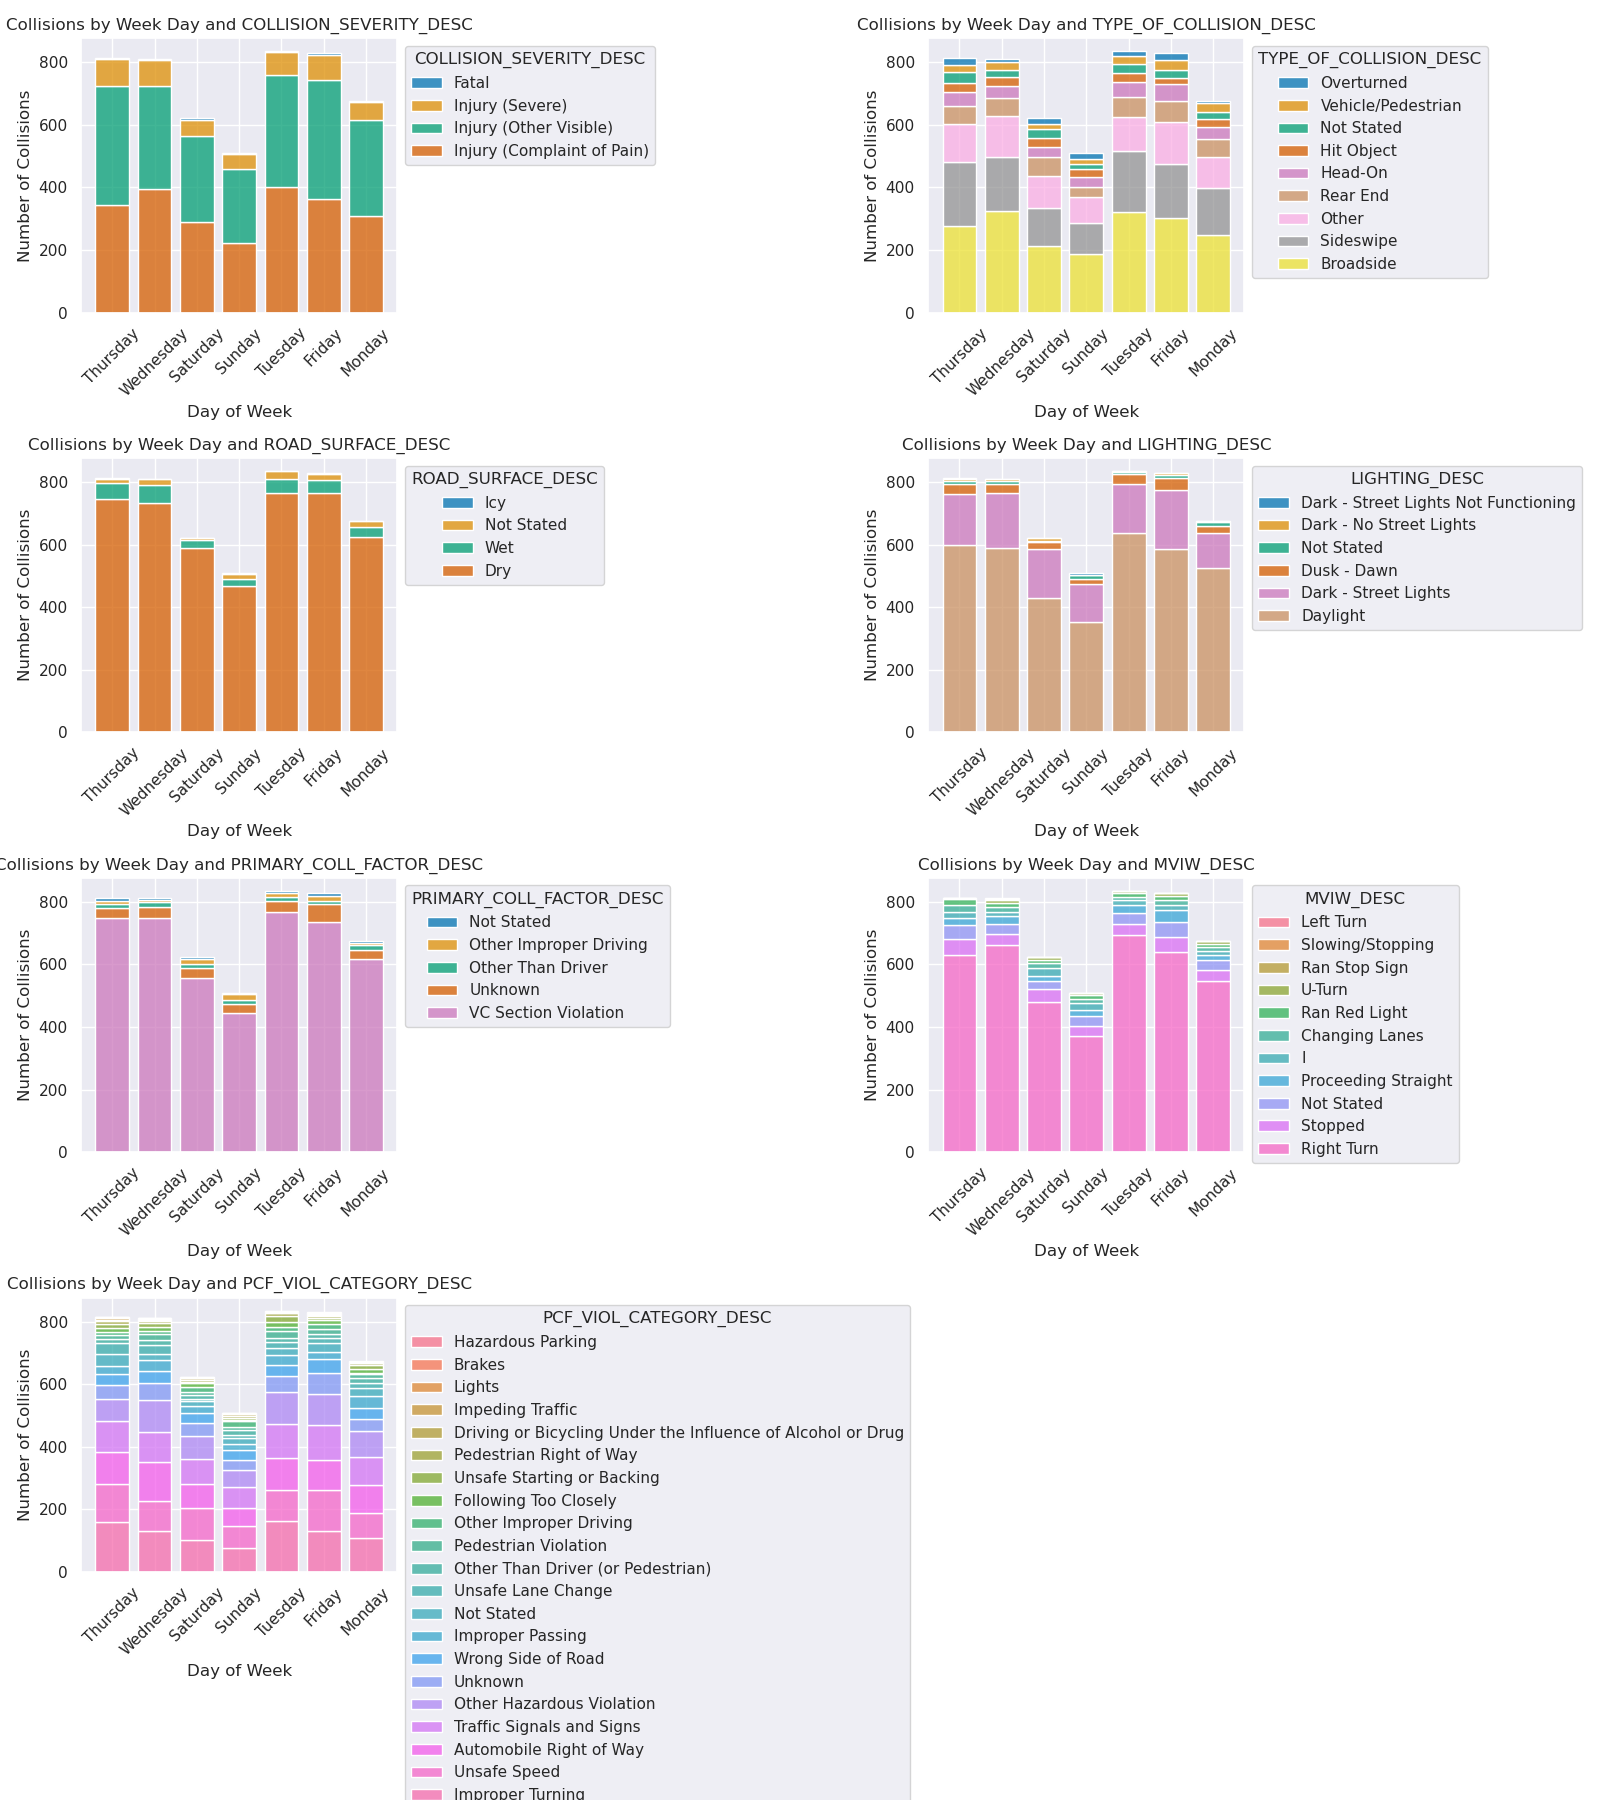

In [22]:
Image(filename = "figures/Collisions_Conditions_by_Day.png")

Next we explore the time of day and how that correlates with bike crashes. In the graphs below we observe that weekday crashes are markedly near morning and evening commute time of the 9-5 workday, while weekends follow a more normal distribution. The overwhelming majority of weekday crashes mean that the cumulative collision by time of day graph follows most closely with the weekday trends.

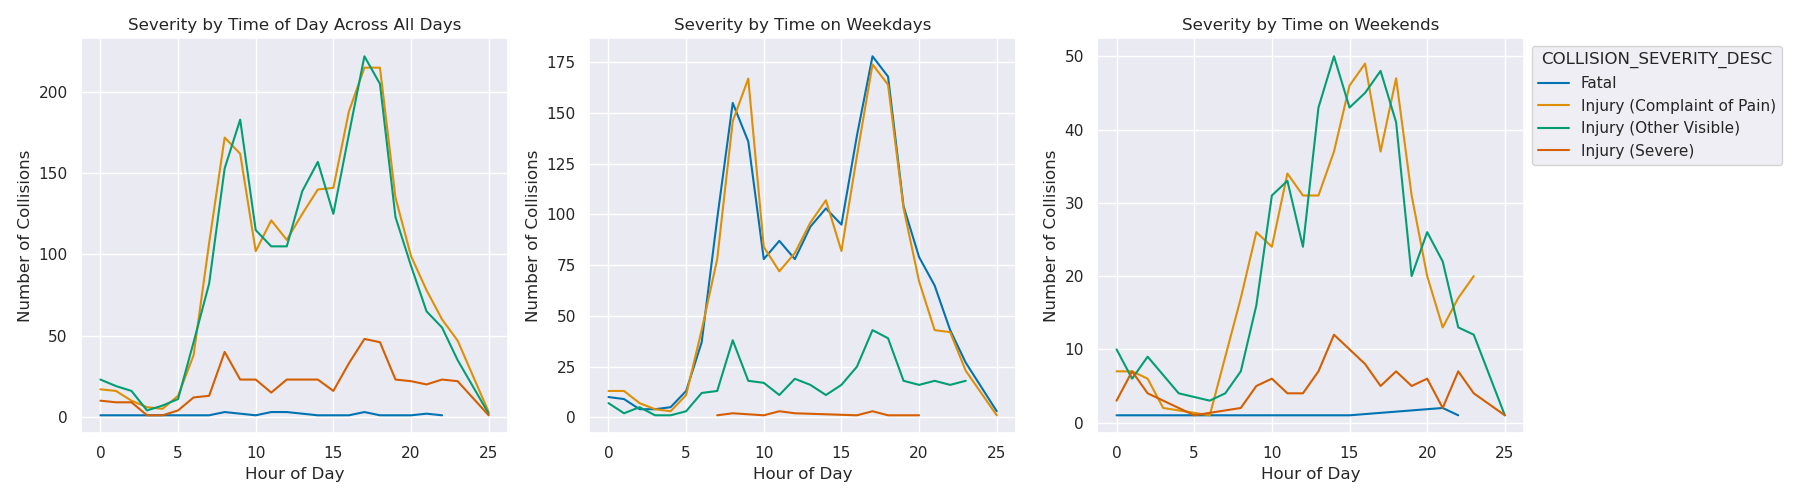

In [24]:
Image(filename = "figures/Collisions_by_TOD.png")

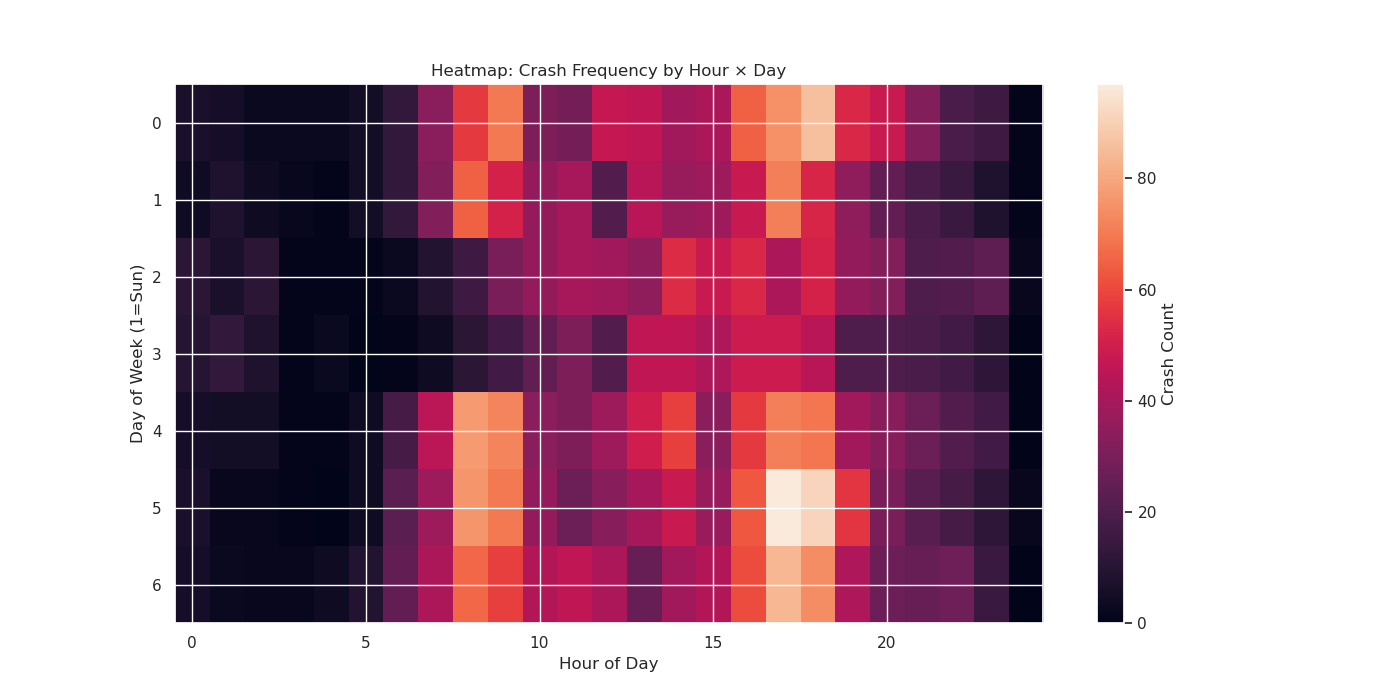

In [25]:
Image(filename = "figures/Crash_Heatmap.png")

#### Severe Crashes

The focal point of our research question is to understand the conditions that are present in the case of severe or fatal crashes. In the data visualizations below, we find a number of insights. Thankfully, the share of fatalities and severe injuries from bike crashes are extremely low compared to minor injuries. When looking at severity proportions by collision factors, a few things come to light. BUI's (Biking Under the Influence), biking on the wrong side of road, brake malfunctions, conditions other outside of the biker's control seem to have higher proportions of crash severity.

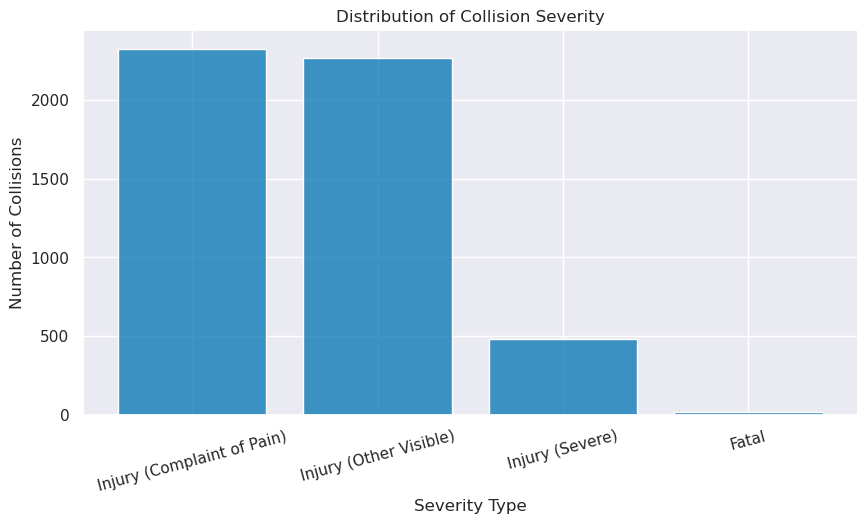

In [30]:
Image(filename = "figures/Distr_Collision_Severity.png")

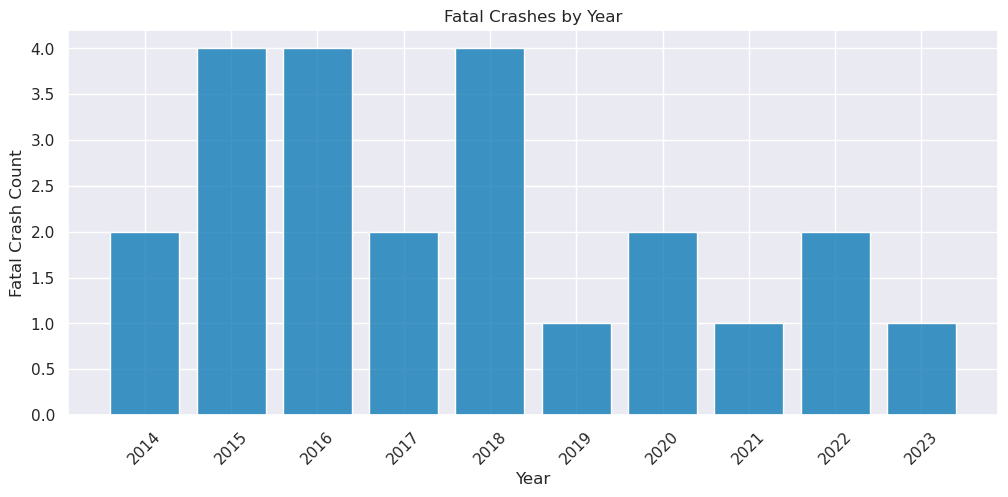

In [31]:
Image(filename = "figures/Fatalities_by_year.png")

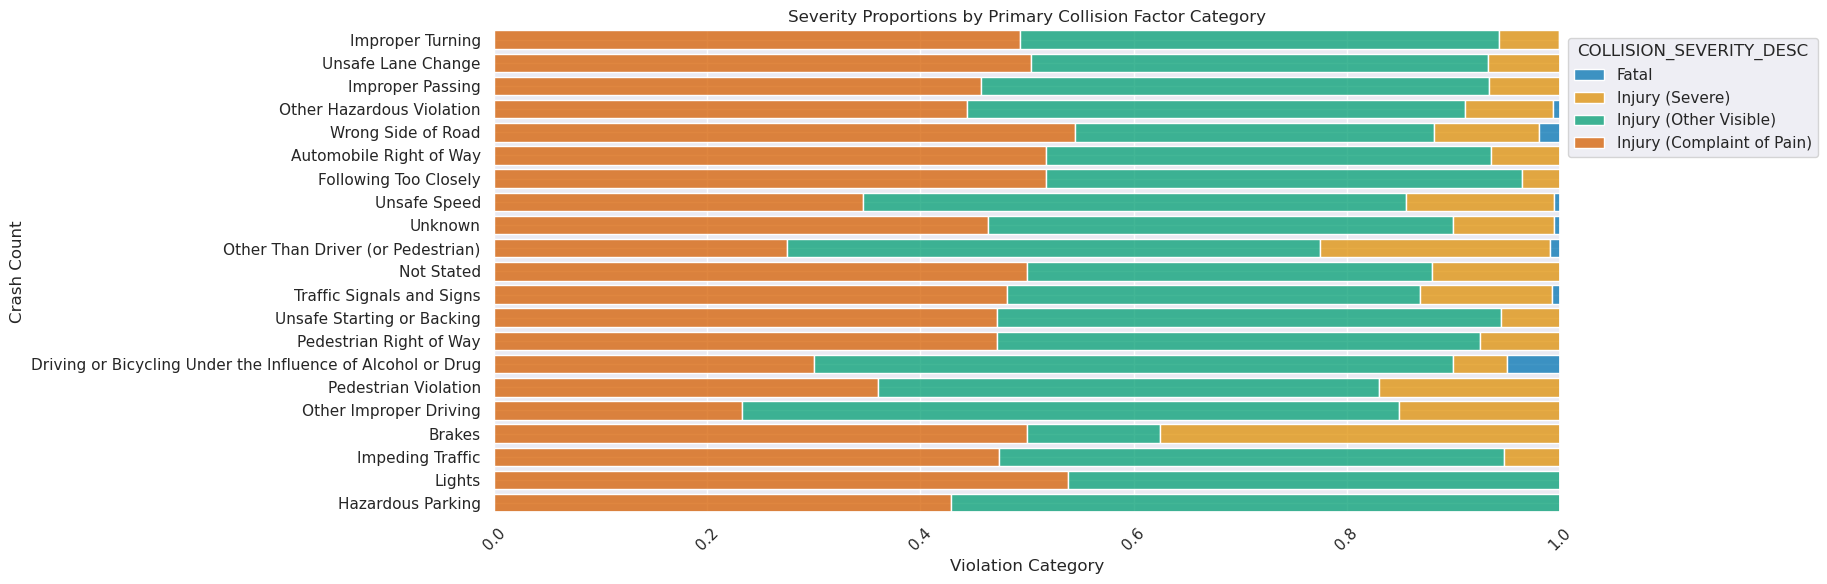

In [32]:
Image(filename = "figures/Collis_Factor_Proportions.png")

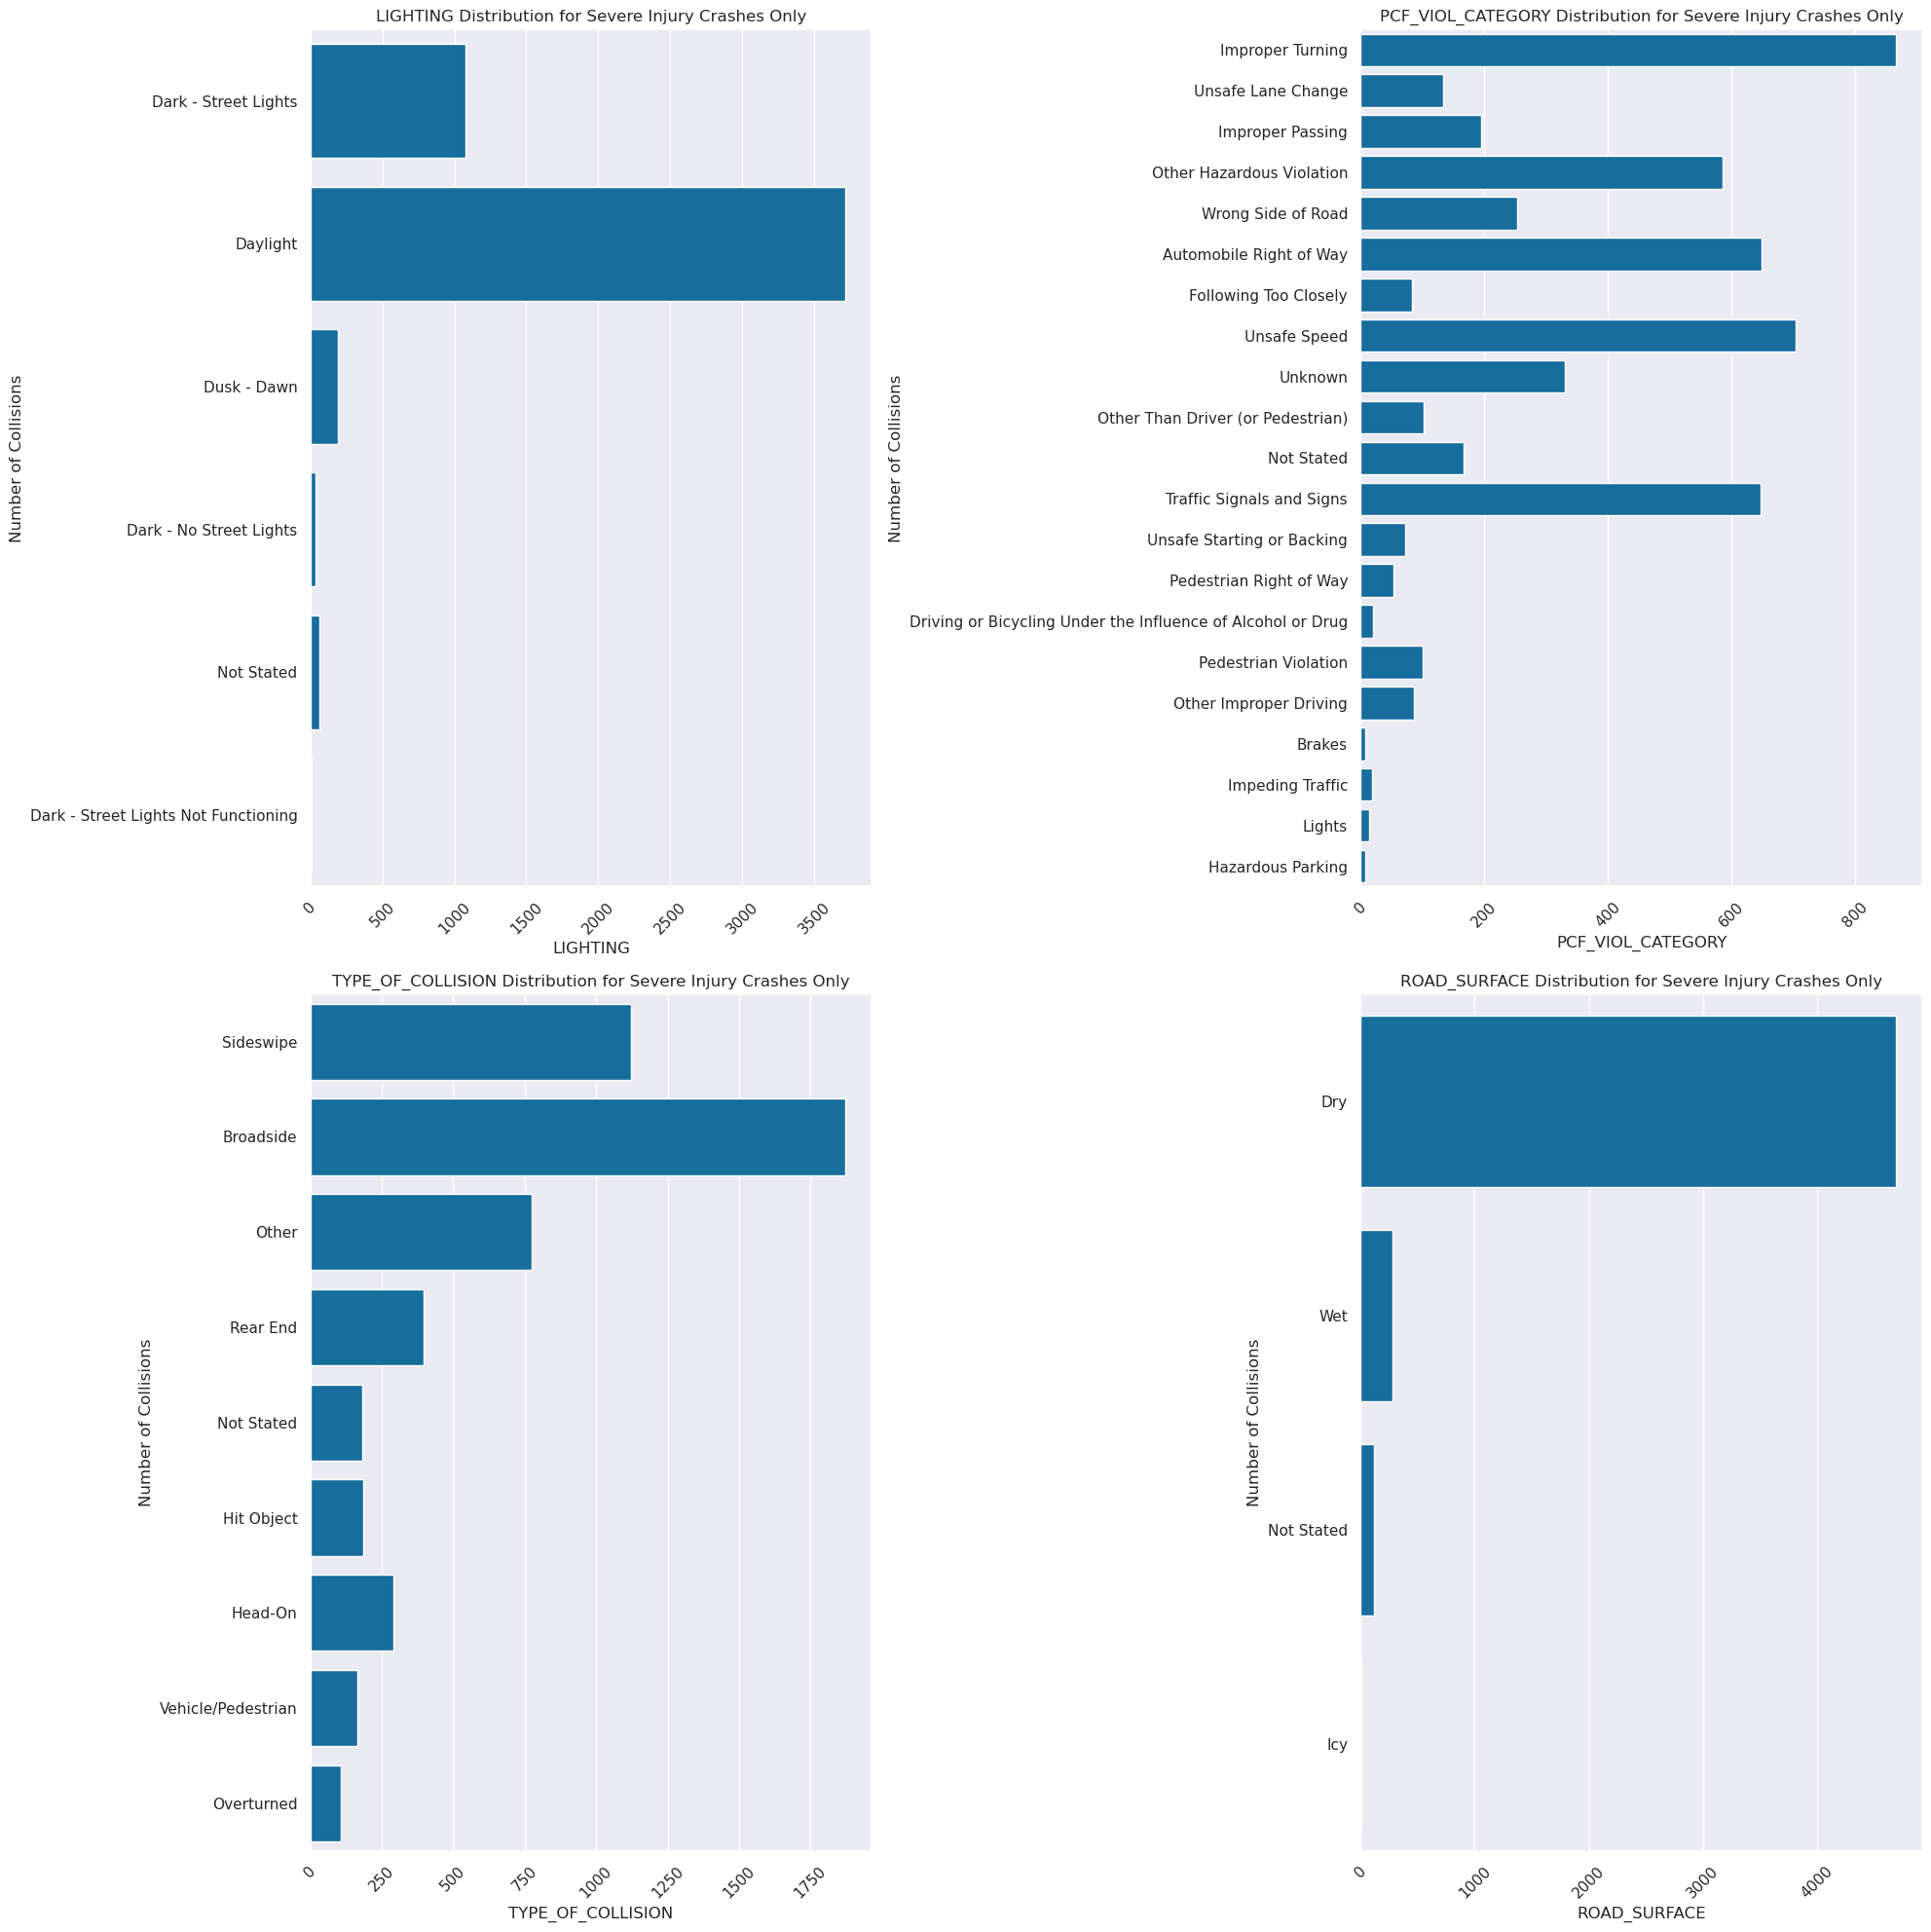

In [33]:
Image(filename = "figures/Severe_Conditions.png")

## Author Contributions

Author Contributions section: your main.ipynb notebook should contain, at the end, a brief section titled Author Contributions. This section should indicate, for each team member, what they did in the project. It doesn’t have to be a long, detailed story, a few sentences per person should suffice. All team members must agree to the language in this section. (By the way, this is standard practice in many scientific journals). While in principle the project grade is the same for all team members, we reserve the right to lower the grade of anyone who doesn’t contribute to the team effort.

### Bibliography

 Please also include a bibliography of works that you cite. This could be previous work that motivates the question you are investigating and why it’s interesting, any methods that you might be employing from the literature, or the dataset you are using. We ask that you do this by including all of your references in a BibTeX file and cite them in this main narrative by referencing the relevant entry in your BibTeX file. For more details, see the Lab 8 material.